# Datos de consigna

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
# Consigna
Vo = np.array([112,16])
Vd = 300
AL = 4700e-9# H/n**2
Io = 1      # A

In [4]:
# PWM SG3842
# Supply Voltage = 40 Vmax

D = [0, 0.5]
D = 0.25
K_D = D/(1-D)

In [5]:
# Relaciones de vueltas
N_2vN_1 = 1/(Vd/Vo*K_D)
#N_2vN_1 = N_2vN_1/N_2vN_1.min()

#N_1 = N_2vN_1*K_D/Vo*Vd
N_1 = 25
N_2 = N_1 * N_2vN_1
N2 = int(N_2[0])
N3 = int(N_2[1])

print(N2, N3)

28 4


# VALORES DE INDUCTORES

In [7]:
# Escala de vueltas
K = 1
N_all = np.array([N_1,N_2[0],N_2[1]])*K
N1 = int(N_all[0])
N2 = int(N_all[1])
N3 = int(N_all[2])
print(N1, N2, N3)

L1 = AL*N1**2
L2 = AL*N2**2
L3 = AL*N3**2

Ldisp = 0.1*L1
Lmag = 0.9*L1
ImaxL1 = 0.34
V_swMax = 300 + 28*N1/N2 + 4*N1/N3
#V_swMax = 640
print(L1)
print(Ldisp)
print(Lmag)
print(V_swMax)


25 28 4
0.0029375
0.00029375
0.0026437500000000003
350.0


# CALCULO DE R_snubber y C_snubber

In [8]:
def capa(L, I, vc):
    return L*I*I/(vc*vc)

vc = 1000
fs = 75e3
T = 1/fs
D = 0.25

C = 120e-12#capa(Ldisp, ImaxL1, vc)
C = 3e-9
C = 1e-9
print("C: ",C)

t_on = D*T

R = t_on/(3*C)
print("R: ",R)

R_test = 390
print(R_test*C)

R_snubber = 6800
C = 120e-12

C:  1e-09
R:  1111.1111111111109
3.9e-07


In [12]:
# Parámetros del núcleo
B_sat = 200e-3  #T
R = 1/AL
A = 280e-6      #mm**2
A_min = 351e-6 # mm**2

In [27]:
# Parámetros de Switching
F_SW = 100e3  # Hz
T_SW = 1/F_SW
skin = 66/np.sqrt(F_SW)

d_max = 2*skin

# Resolución de N1

In [8]:
from sympy import Symbol
from sympy.solvers import solve

In [16]:
I_rms = .34     #A
F_SW = 100e3
T_SW = 1/F_SW

AL = 4700e-9    # H/n**2

B_sat = 200e-3  #T
R = 1/AL
A = 280e-6      #mm**2
A_min = 351e-6  # mm**2

In [17]:
a0 = 0.5*Vd*D*T_SW/A_min
a1 = B_sat
a2 = I_rms/R/A

In [18]:
N_i = Symbol('N1')
solve(a2*N_i**2-a1*N_i+a0)

[6.57579570880822, 28.4680090471367]

In [19]:
N1_range = [7,29]

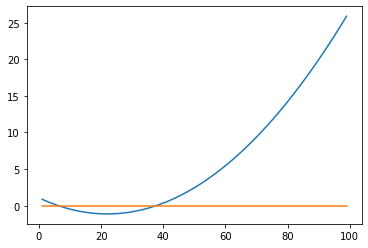

In [21]:
nn = np.arange(1,100)
zz = np.zeros(nn.size)
bb = nn**2*I_rms/R/A_min-nn*B_sat+0.5*Vd*D*T_SW/A_min

plt.plot(nn, bb, nn, zz)
plt.show()

# Corrientes de Carga

In [22]:
N1 = 25

In [24]:
I_1max = (B_sat-0.5*Vd*D*T_SW/N1/A_min)/(N1*AL/A)
I_1max

0.3747590470994726

In [32]:
s_max = skin**2*np.pi
print(s_max)    # area maxima de seccion de cada hilo de cobre
print(2*skin)   # diametro maximo del cobre conductor 

0.13684777599037137
0.41742065114222604


In [29]:
I_DC_max = 0.35
J = 4
I_DC_max/J/s_max

0.6393965803737761

# Valores Seleccionados

In [93]:
N_2vN_1 = np.array([0.48, 0.16])

In [94]:
N1 = 25
N2 = N1*N_2vN_1

I_1max = 0.34   # A
d_cu = 0.33
s_cu = (d_cu/2)**2*np.pi

J1 = I_1max/s_cu

In [98]:
I_2max = I_1max*N1/N2
print(I_2max)

J2 = I_2max/s_cu
print(J2)

n2_cu = J2/4
print(n2_cu)

[0.70833333 2.125     ]
[ 8.28170809 24.84512427]
[2.07042702 6.21128107]


# Considerando el secundario de 16 V con solamente el límite del pwm

In [102]:
I_pwm = 0.5
J = I_pwm/s_cu
print(J)

n_pwm = I_pwm/4/s_cu
print(n_pwm)

5.845911591988808
1.461477897997202
